In [11]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 

## Import data

The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers.

In [13]:
df_adv = pd.read_csv('Advertising.csv',index_col=0) 
df_adv.sample(5)

,TV,Radio,Newspaper,Sales
62,261.3,42.7,54.7,24.2
198,177.0,9.3,6.4,12.8
22,237.4,5.1,23.5,12.5
70,216.8,43.9,27.2,22.3
7,57.5,32.8,23.5,11.8


In [57]:
# Easy way to check NaN
df_adv.isna().values.any()

False

## Split DataFrame into Train and Test

In [15]:
features = ['TV','Radio','Newspaper']

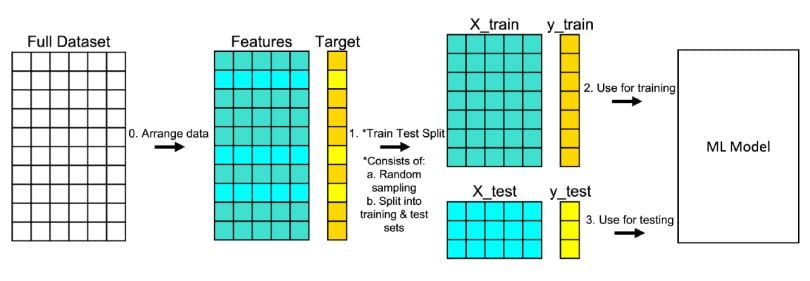

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        df_adv[features], df_adv['Sales'], random_state=0)

## Initiate the model and train the train-group

In [16]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## Predict the test group with trained model

In [31]:
reg.predict(X_test)

array([10.0494569 ,  7.43052335,  6.97152143, 24.16378667, 12.00215643,
        6.54334645, 13.09526331, 14.95879164, 11.00528358, 16.27234553,
       22.99324688,  9.12188347, 10.33545333, 15.39628185, 11.60589932,
       12.11484332, 18.60251172, 10.81414474, 16.07541355, 17.22753644,
       24.2342995 ,  9.47711838, 15.13960412, 12.41064749,  5.67814427,
       15.22889947, 12.21635459, 20.94370559, 13.28068231,  9.16578351,
       13.30285718, 21.5770033 , 18.098111  , 21.15572322,  6.69734039,
        6.15355714,  7.96280151, 13.09426248, 14.81032968,  6.22020075,
       12.2799744 ,  9.1817324 , 15.04882696, 16.26091437, 17.16859664,
       13.32831849,  3.69143664, 12.43931798, 15.87909695,  8.68626862])

## Show the accuracy of prediction and actual

In [32]:
reg.score(X_test, y_test)

0.8576396745320893

## Show Mean Square Error and Root Mean Square Error

In [40]:
# Mean Square Error
mean_squared_error(reg.predict(X_test), y_test)

4.012497522917099

In [43]:
# Root Mean Square Error (RMSE)
error_term = mean_squared_error(reg.predict(X_test), y_test, squared=False)

## Predict sales with a combination of advertising

In [18]:
new_ads = pd.DataFrame(np.array([[260, 14.5, 40]]), columns=features )
new_ads

,TV,Radio,Newspaper
0,260.0,14.5,40.0


In [47]:
print(f"{new_ads}\n\nExpected Sales > {reg.predict(new_ads)[0]:0.4f}" )
print(f"Error term > +/- {error_term:0.4f}" )

      TV  Radio  Newspaper
0  260.0   14.5       40.0

Expected Sales > 17.3068
Error term > +/- 2.0031


## The Intercept and Coefficient of Ordinary Square Linear Formula 

In [61]:
reg.intercept_

2.8925700511511483

In [62]:
# Coeficient of TV  Radio  Newspaper
reg.coef_

array([0.04416235, 0.19900368, 0.00116268])